# Spherical waves

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh
import pandas as pd
from numpy.random import randn
from scipy.stats import norm
from ipywidgets import Image
from time import sleep,time
from threading import Thread
from ipycanvas import MultiCanvas, hold_canvas,Canvas

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# default values for plotting
plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 


In [7]:
def spherical_wave(k,omega,r,r0,t):
    k=np.linalg.norm(k)
    return(np.exp(1j*(k*np.linalg.norm(r-r0)-omega*t)/np.linalg.norm(r-r0)))

#### Plot the amplitude of the field as a functon of distance

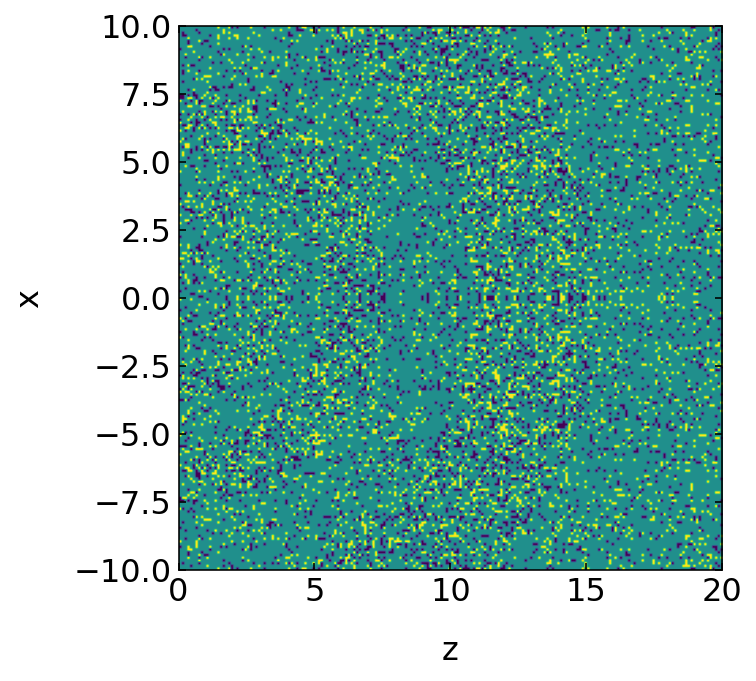

In [10]:
plt.figure(figsize=(5,5))

x=np.linspace(-10e-6,10e-6,200)
z=np.linspace(0,20e-6,200)

X,Z=np.meshgrid(x,z)
r=np.array([X,0,Z])

wavelength=532e-9
k0=2*np.pi/wavelength
c=299792458
omega0=k0*c

k=k0*np.array([0,0,1.])
r0=np.array([0,0,-10e-9])

field=spherical_wave(k,omega0,r,r0,0)
#plt.contourf(Z,X,np.abs(field)**2,20)

extent = np.min(z)*1e6, np.max(z)*1e6,np.min(x)*1e6, np.max(x)*1e6
plt.imshow(np.real(field.transpose()),extent=extent)

plt.xlabel('z')
plt.ylabel('x')
plt.show()

Text(0, 0.5, 'intensity [a.u.]')

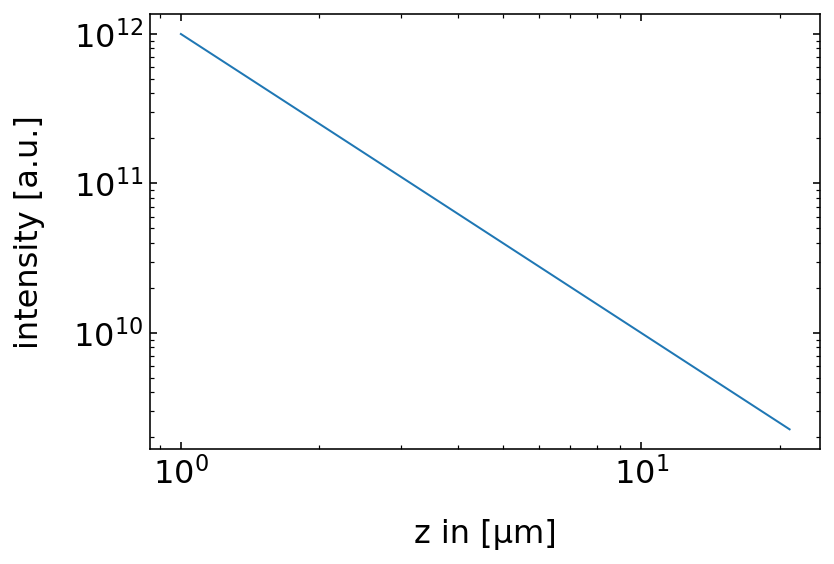

In [31]:
plt.loglog((z+1e-6)*1e6,np.abs(field.transpose()[100,:])**2)
plt.xlabel('z in [µm]')
plt.ylabel('intensity [a.u.]')

#### Plot the intensity in a plane z


We can alo plot the intensity of a spherical wave at a certain distance from the source in the xy-plane.

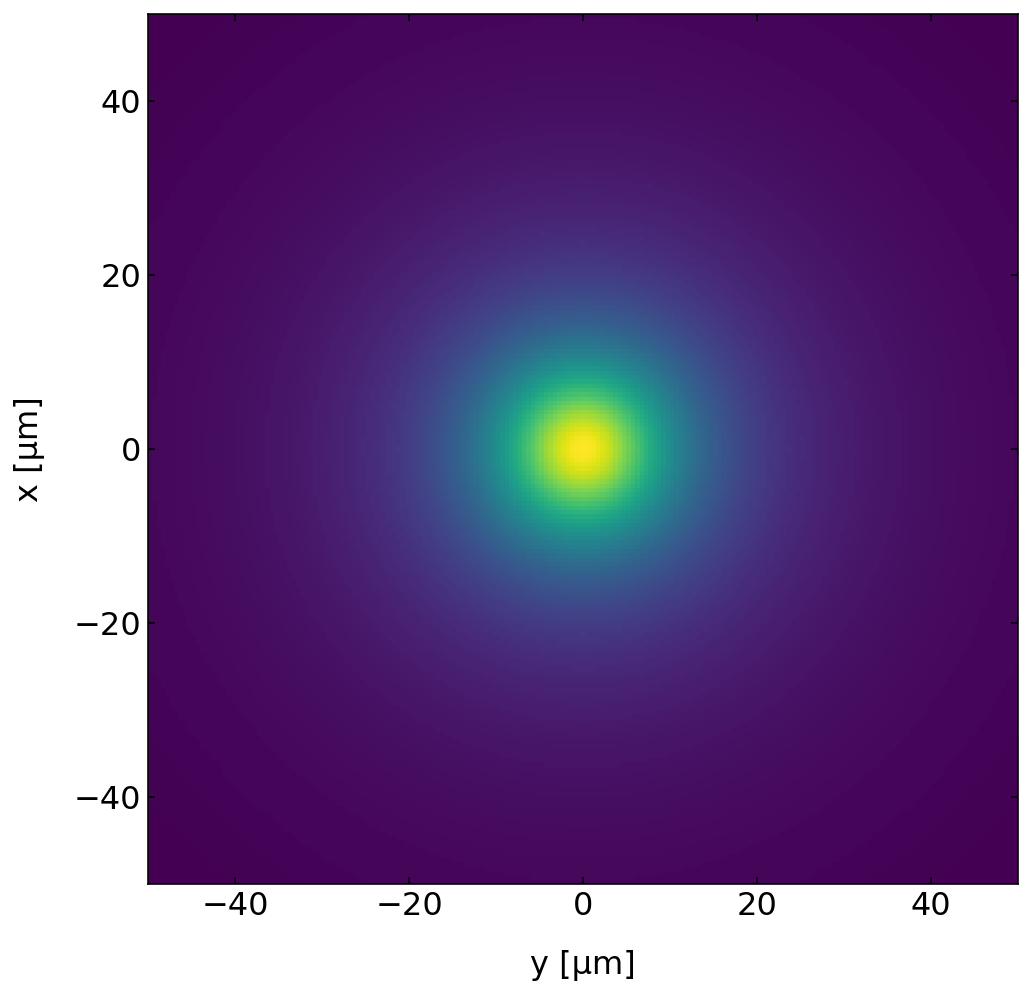

In [37]:
plt.figure(figsize=(8,8))
x=np.linspace(-50e-6,50e-6,200)
y=np.linspace(-50e-6,50e-6,200)

X,Y=np.meshgrid(x,y)
r=np.array([X,Y,10e-6])
k1=2*np.pi/wavelength*np.array([0j,0j,1+0j])
r0=np.array([0,0,-20e-9])
field=spherical_wave(k1,r,r0)
cmap = plt.cm.get_cmap("jet")

#plt.contourf(Z,X,np.abs(field)**2,100)
plt.imshow(np.abs(field)**2,extent=[-50,50,-50,50])

plt.xlabel('y [µm]')
plt.ylabel('x [µm]')
plt.show()

#### Interference between a spherical and a plane wave

In [45]:
def plane_wave_phase(k,r,phi):
    return(np.exp(1j*(np.dot(k,r)+phi)))

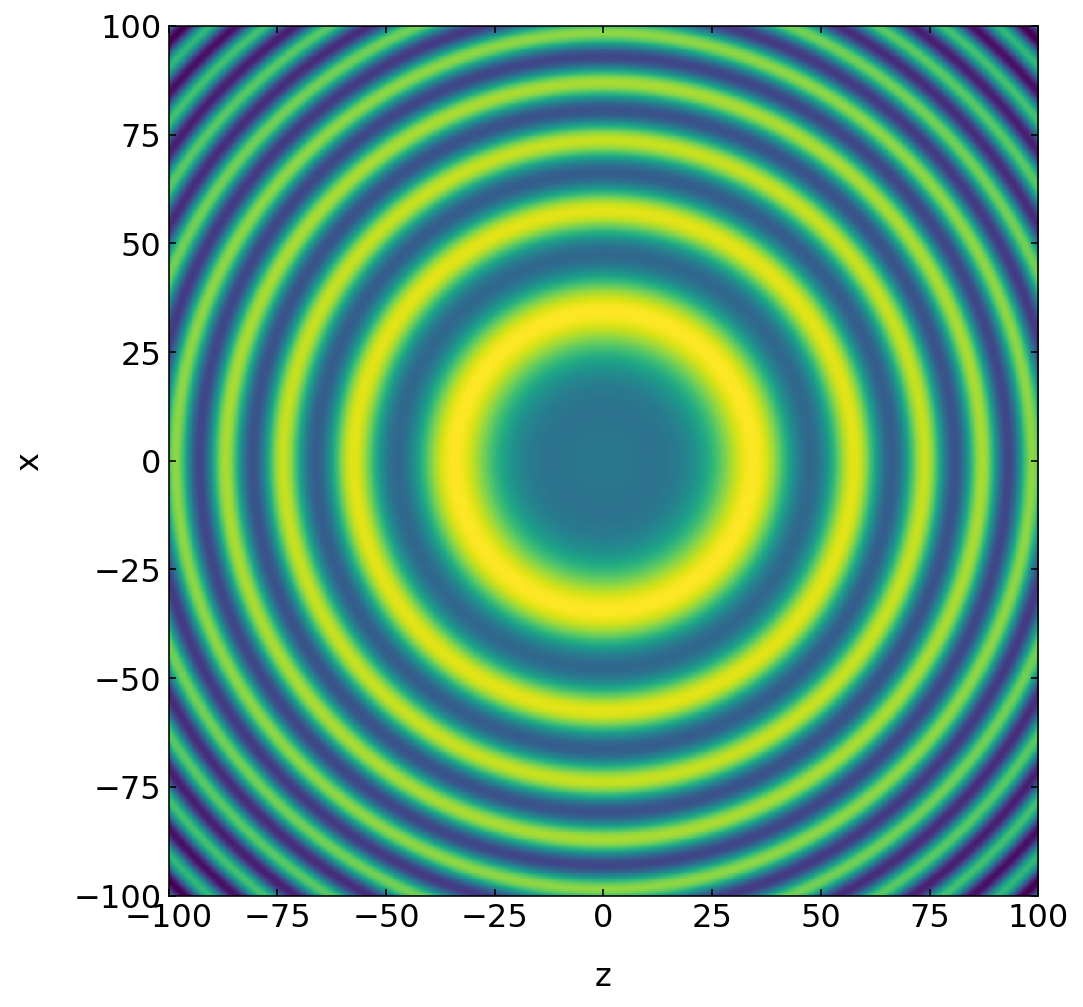

In [44]:
plt.figure(figsize=(8,8))
x=np.linspace(-100e-6,100e-6,1000)
y=np.linspace(-100e-6,100e-6,1000)

X,Y=np.meshgrid(x,y)
r=np.array([X,Y,2000e-6])
k1=2*np.pi/wavelength*np.array([0j,0j,1+0j])
r0=np.array([0,0,-2e-6])

field=plane_wave(k1,r,2)+spherical_wave(k1,r,r0)
cmap = plt.cm.get_cmap("jet")

extent = np.min(y)*1e6, np.max(y)*1e6,np.min(x)*1e6, np.max(x)*1e6
plt.imshow(np.abs(field.transpose()),extent=extent)

plt.xlabel('z')
plt.ylabel('x')
plt.show()


### Diffraction pattern of a single slit using Huygens principle

The Huygens principle states, that each point is space which which is experiencing an electromagnetic wave is the source of a spherical wave. This means nothing else, that any wave can be expanded into a superposition of spherical waves, which is the fundamental of Mie scattering for example. Here we would like to have a look at the Huygens principle by playing around with the interference from multiple sources arranged in a line. Using this way we can simulate the diffraction patterns from a slit or a grating.

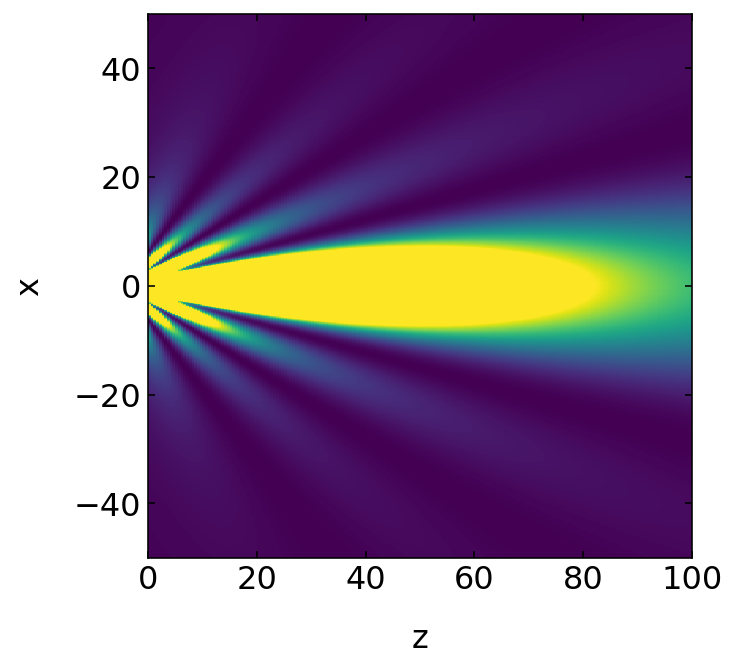

In [95]:
plt.figure(figsize=(5,5))

x=np.linspace(-50e-6,50e-6,1000)
y=np.linspace(-50e-6,50e-6,1000)
z=np.linspace(0,100e-6,200)

X,Z=np.meshgrid(x,z)
r=np.array([X,0,Z])

k=k0*np.array([0j,0j,1+0j])

field=0
d=2e-6
for x0 in np.linspace(-d/2,d/2,100):    
    r0=np.array([x0,0,-5e-6])
    field=field+spherical_wave(k,r,r0)

field=field/np.max(field)
extent = np.min(z)*1e6, np.max(z)*1e6,np.min(x)*1e6, np.max(x)*1e6
plt.imshow(np.abs(field.transpose())**2,extent=extent,vmin=0,vmax=0.01)

plt.xlabel('z')
plt.ylabel('x')
plt.show()

**exercise**

Plot the intensity pattern at a certain distance z and compare that to the analytical solution

\begin{equation}
I=I_{0}\left (\frac{\sin(\delta)}{\delta}\right )^2
\end{equation}

where 
\begin{equation}
\delta=\frac{\pi d}{\lambda}\sin(\theta)
\end{equation}

and $d$ is the slit width.

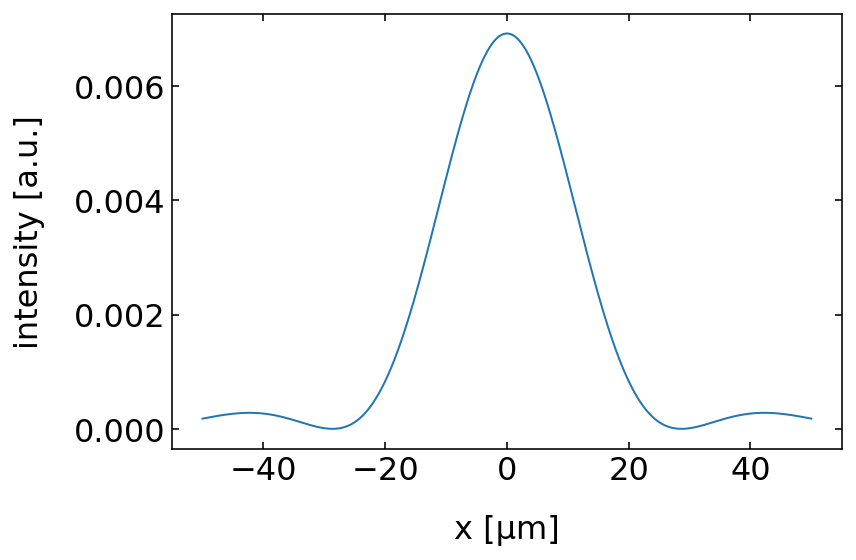

In [96]:
## code goes here

plt.plot(x*1e6,np.abs(field[199,:])**2)
plt.xlabel('x [µm]')
plt.ylabel('intensity [a.u.]')
plt.show()

**exercise**

create the intensity pattern generated by a grating with 10 slits of width $d$ and distance $D$. Compare that to the analytical solution.

\begin{equation}
I=I_{0}\left (\frac{\sin(\delta)}{\delta}\right )^2\left (\frac{\sin(N\gamma)}{\sin(\gamma)}\right )^2
\end{equation}


where 
\begin{equation}
\gamma=\frac{\pi D}{\lambda}\sin(\theta)
\end{equation}

and $N$ is the number of slits.

In [80]:
## code goes here

## Gaussian Beams

A Gaussian beam is an important solution in optics as it represents a confined electromagnetic wave in form of a beam. It is the solution of the paraxial Helmholtz equation:

\begin{equation}
\left ( \frac{\partial^2 }{\partial x^2}+\frac{\partial^2 }{\partial y^2}-2ik\frac{\partial }{\partial z}\right ) E(\vec{r})=0
\end{equation}

The solution is given by 

\begin{equation}
E(r,z)=E_{0}\frac{w_0}{w(z)}e^{-\frac{r^2}{w(z)^2}}e^{-i\left [ kz+k\frac{r^2}{2R(z)} -\Psi(z)\right ]}
\end{equation}

and is the standard representation of focused beams in optics. 

In [97]:
def gaussian_beam(k,r,w0):
    zr=np.pi*w0**2*k/2/np.pi
    x=r[0]
    y=r[1]
    z=r[2]
    rho2=x**2+y**2
    w=w0*np.sqrt(1+(z/zr)**2)
    R=z*(1+(zr/z)**2)
    psi=np.arctan(z/zr)
    E=w0*np.exp(-rho2/w**2)*np.exp(-1j*(k*z+k*rho2/(2*R)-psi))/w
    return(E)

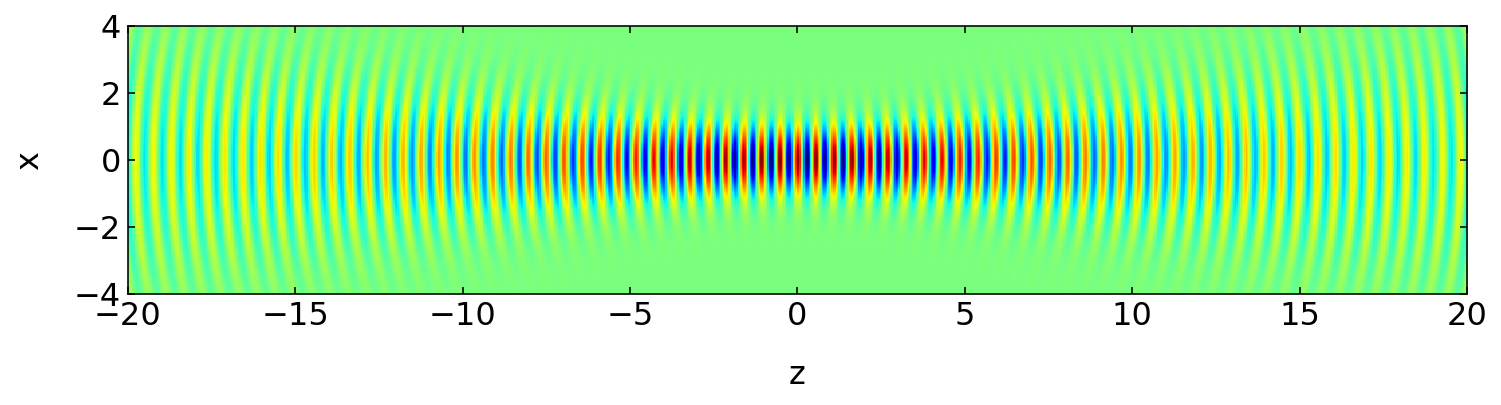

In [22]:
x=np.linspace(-4e-6,4e-6,1000)
y=np.linspace(-10e-6,10e-6,1000)
z=np.linspace(-20e-6,20e-6,1000)


#X,Y=np.meshgrid(x,y)
X,Z=np.meshgrid(x,z)
r=np.array([X,0,Z])

plt.figure(figsize=(12,8))
field=gaussian_beam(k0,r,1e-6)
extent = np.min(z)*1e6, np.max(z)*1e6,np.min(x)*1e6, np.max(x)*1e6

plt.imshow(np.real(field.transpose()),cmap='jet',extent=extent)
plt.xlabel('z')
plt.ylabel('x')
plt.show()

/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'color'
  s)


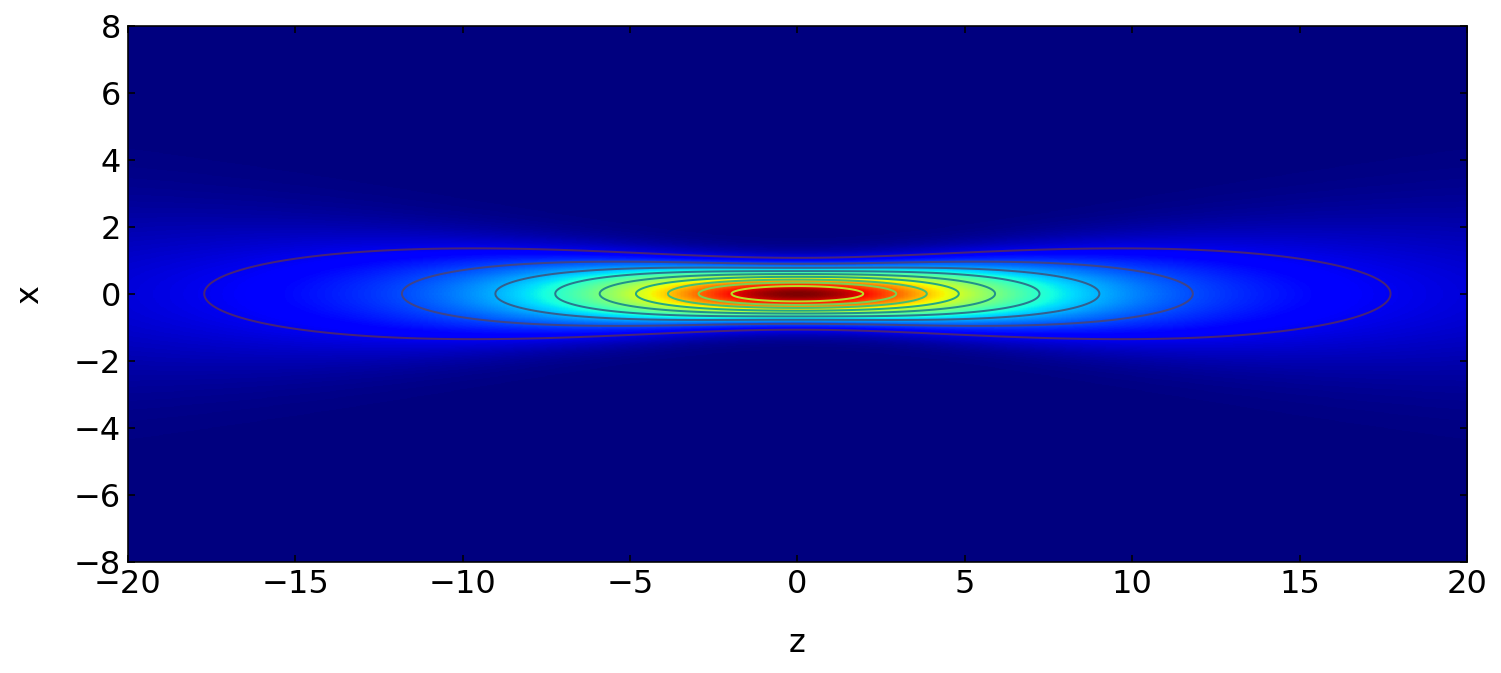

In [23]:
x=np.linspace(-8e-6,8e-6,1000)
y=np.linspace(-2e-6,2e-6,1000)
z=np.linspace(-20e-6,20e-6,1000)



#X,Y=np.meshgrid(x,y)
X,Z=np.meshgrid(x,z)
r=np.array([X,0,Z])

plt.figure(figsize=(12,8))
field=gaussian_beam(k0,r,1e-6)


extent = np.min(z)*1e6, np.max(z)*1e6,np.min(x)*1e6, np.max(x)*1e6

plt.imshow(np.abs(field.transpose())**2,cmap='jet',extent=extent)
plt.contour(Z*1e6,X*1e6,np.abs(field)**2,10,color='grays')

plt.xlabel('z')
plt.ylabel('x')
plt.show()

**exercise**

Try to find the width of the Gaussian beam numerically and plot it as a function of propagation distance.

In [24]:
## code goes here

A Gaussian beam is characterized by a Gaussian intensity distribution perpendicular to the optical axis. We can check that by plotting the intensity of the beam at a certain position z along the progation direction.

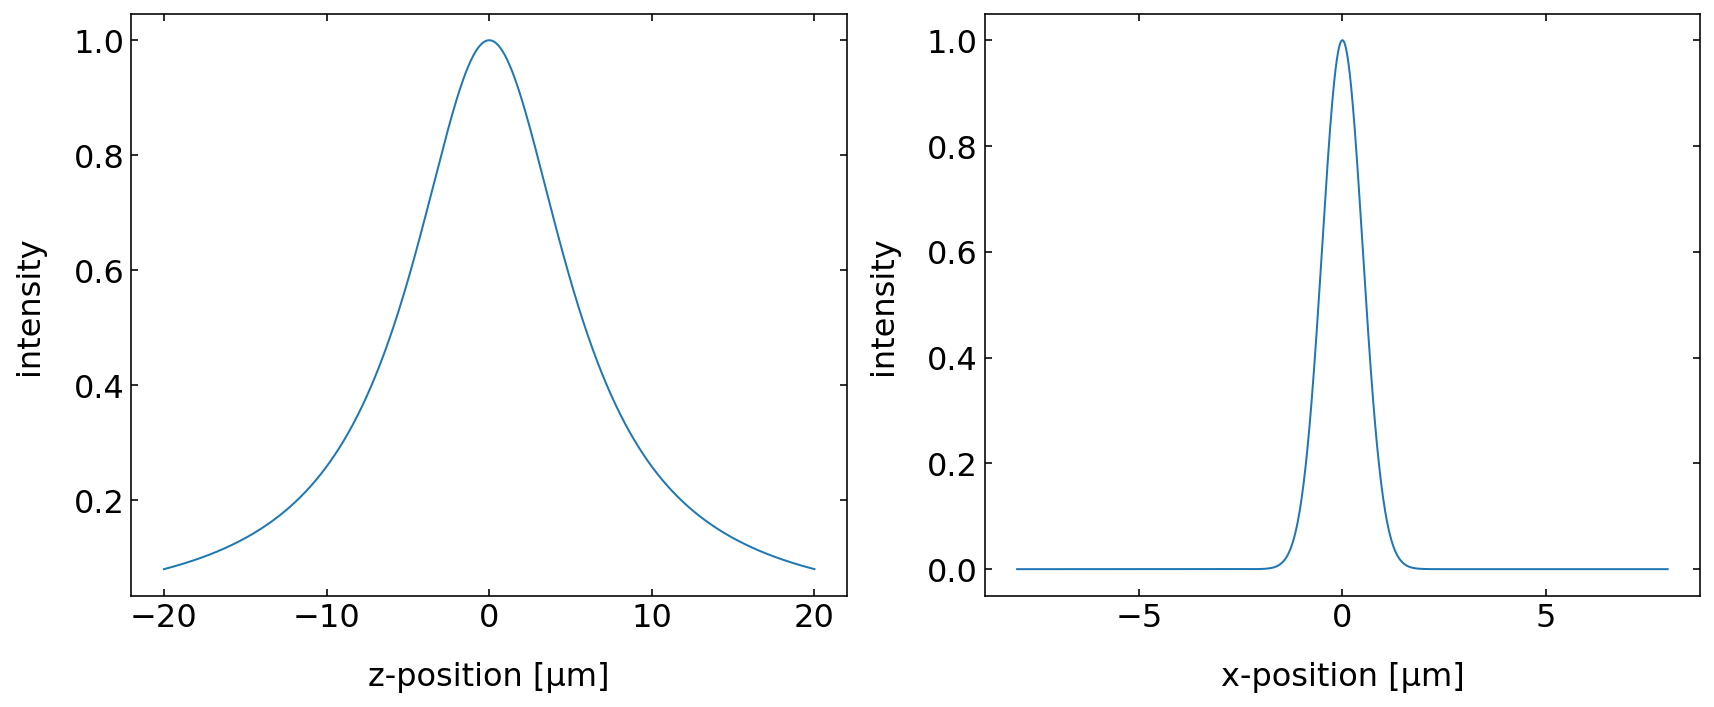

In [25]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(z*1e6,np.abs(field[:,500])**2)
plt.xlabel('z-position [µm]')
plt.ylabel('intensity')
plt.subplot(1,2,2)
plt.plot(x*1e6,np.abs(field[500,:])**2)
plt.xlabel('x-position [µm]')
plt.ylabel('intensity')
plt.tight_layout()
plt.show()

## Oscillating Dipole Field

In the case of fluorescence light emitted by a molecules for example, the radiation source is an oscillating dipole. The oscillating dipole field is given by

\begin{equation}
\vec{E}=\frac{1}{4\pi \epsilon_{0}}\left [ \frac{ k^2}{r} (\hat{r} \times \vec{p})\times \hat{r}+\left (\frac{1}{r^3}-\frac{i k}{r^2} \right )(3\hat{r}[\hat{r}\cdot \vec{p}-\vec{p}]) \right ]e^{i k r}
\end{equation}

Write a function which calculates the dipole field at a given point $r$. In a scattering problem, the dipole is excited by the electric field of a plane wave or Gaussian bea, at the position of the dipole. In the far field, the dipole electric field is interfering 

In [99]:
def dipole_wave(p,k,r):
    k=np.linalg.norm(k)
    k=1
    x=r[0]
    y=r[1]
    z=r[2]
    dr=np.sqrt(x**2+y**2+z**2)
    ex=x/dr
    ey=y/dr
    ez=z/dr
    er=np.array([ex,ey,ez])
    term1=np.cross(np.cross(er,p),er)*k**2/dr
    term2=(er*np.dot(er,p)-p)*(1/dr**3-1j*k/dr**2)
    total=(term1+term2)*np.exp(1j*k*r)
    return(total)

In [100]:
x=np.arange(-10,10,0.1)
y=np.arange(-20,20,0.1)
z=np.arange(-10,10,0.1)

p=np.array([1,0,1])

field=np.zeros([len(x),len(z)])
    
for i in range(len(x)):
    for j in range(len(z)):
            r=np.array([x[i],0,z[j]])
            f=np.abs(np.dot(dipole_wave(p,k,r),dipole_wave(p,k,r)))
            #f=(dipole_wave(p,k,r))

            if np.sqrt(x[i]**2+z[j]**2)>1.5:
                field[i,j]= f



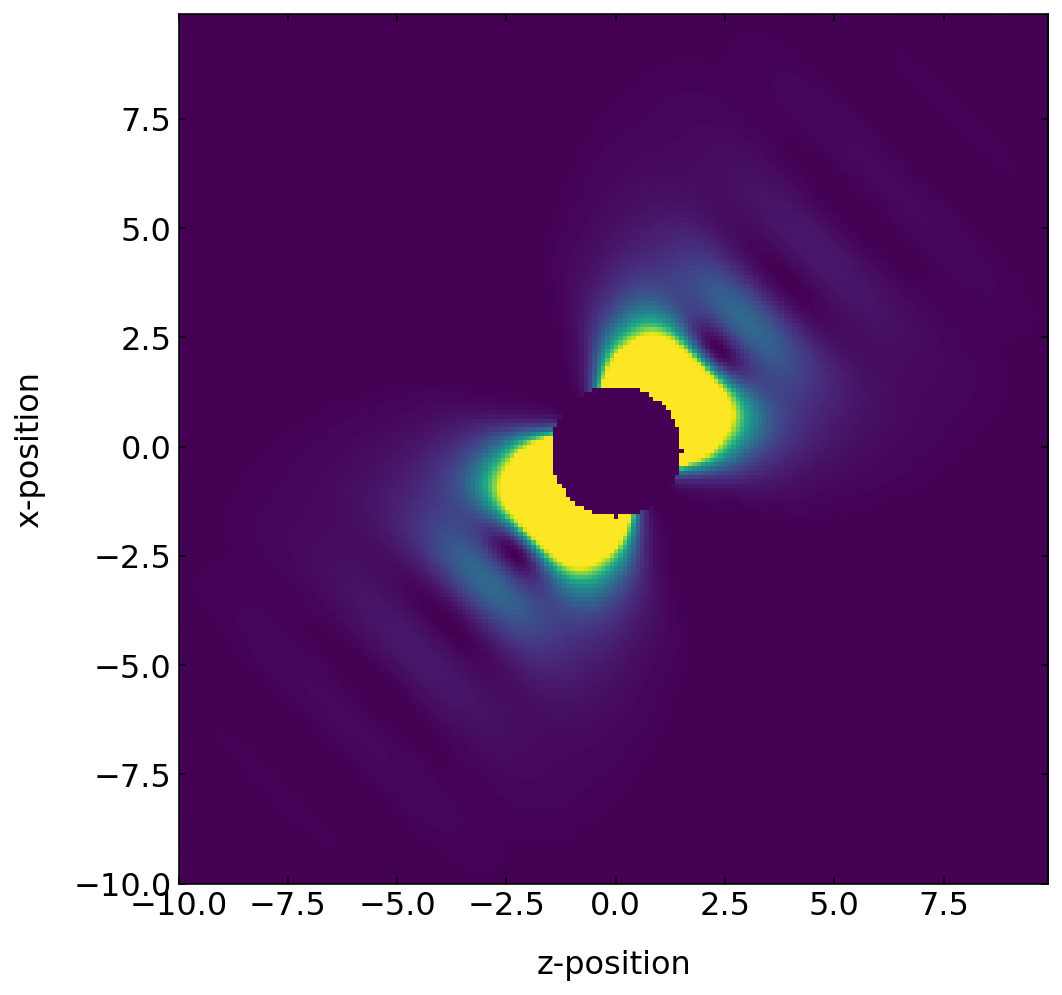

In [108]:
plt.figure(figsize=(8,8))

extent = np.min(z), np.max(z),np.min(x), np.max(x)
plt.imshow(np.abs(field)**2,extent=extent,vmax=0.03)
plt.xlabel('z-position')
plt.ylabel('x-position')
plt.show()

## Lenses

Lenses delay the phase of the electromagnetic wave depending on the distance from the optical axis. 
The delay is measured by the transmission function

\begin{equation}
t(x,y)=\exp\left ( -i k \frac{x^2+y^2}{2f}\right )
\end{equation}

where $f$ is the focal distance. 

In [113]:
def lens(k,r,f):
    x=r[0]
    y=r[1]  
    return(np.exp(-1j*(x**2+y**2)*k/(2*f)))

In [114]:
wavelength=532e-9
k0=2*np.pi/wavelength
k=k0*np.array([0j,0j,1+0j])

In [115]:
x=np.linspace(-5e-6,5e-6,1000)
z=np.linspace(0,10e-6,1000)

X,Z=np.meshgrid(x,z)
r=np.array([X,0,Z])

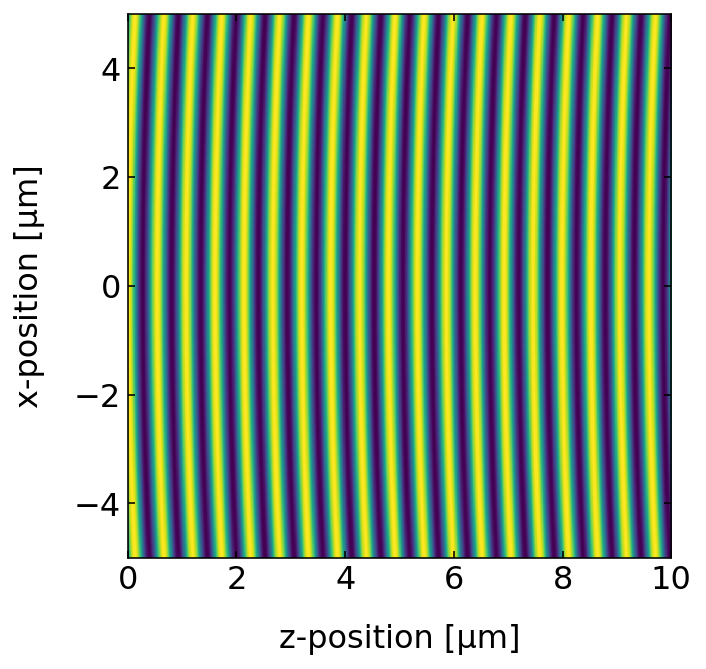

In [118]:
plt.figure(figsize=(5,5))
field=plane_wave(k,r)
phase=lens(k0,r,100e-6)
field=field*phase
extent = np.min(z)*1e6, np.max(z)*1e6,np.min(x)*1e6, np.max(x)*1e6
plt.imshow(np.real(field.transpose()),extent=extent)

plt.xlabel('z-position [µm]')
plt.ylabel('x-position [µm]')
plt.show()